In [95]:
'''
File name: preprocessing.ipynb
Authors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt
Date created: 04/11/2022
Date last modified: 14/12/2022
Python version: 3.8.8
'''

'\nFile name: preprocessing.ipynb\nAuthors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt\nDate created: 04/11/2022\nDate last modified: 14/12/2022\nPython version: 3.8.8\n'

# Bechdel Analysis
>The Bechdel test is a commonly used tool to evaluate the representation of women in fiction. To pass the test, a work of fiction must meet the following three criteria:
\
-It must have at least two named female characters.\
-Those two female characters must have a conversation with each other.\
-That conversation must be about something other than a man.\
While the Bechdel test is not perfect, it is a useful tool to identify gender imbalance in works of fiction. By requiring that female characters have their own agency and agency and engage in conversations with each other about topics other than men, the test encourages writers to create more well-rounded and realistic female characters. We have found a dataset which 



---
## General Information <a id="GI"> </a> 

### Folder structure <a id="Folder"> </a>


### Imports <a id="Imports"> </a>

***Libraries used for milestone 2:***
- python=3.8.12
- pandas
- ast
- datetime
- seaborn
- numpy
- matplotlib
- json

In [96]:
#Imports used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import t 

---
##  Data scraping, pre-processing and dataset construction<a id="Step-1"> </a>

### Pre-processing <a id="#Pre-pro"> </a>
>basic sanity checks etc...

>We are going to load the bechdel dataset. It was downloaded from kaggle https://www.kaggle.com/datasets/alisonyao/movie-bechdel-test-scores?resource=download&select=Bechdel_detailed.csv. 

In [97]:
PATH_DATA = 'data/'

#additionnal datasets:
PATH_MOVIE_BECHDEL = PATH_DATA+'Bechdel.csv'

In [98]:
bechdel=pd.read_csv(PATH_MOVIE_BECHDEL,header=0)
#delte the first column because it conatins the index
del bechdel['id']
bechdel

,title,year,rating,dubious,imdbid,id.1,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0
...,...,...,...,...,...,...,...,...,...
9368,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0
9369,Cruella,2021.0,3.0,0.0,3228774.0,9861.0,19231.0,2021-06-01 03:16:58,1.0
9370,West Side Story,2021.0,3.0,0.0,3581652.0,10157.0,19743.0,2021-12-10 03:10:09,1.0
9371,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0


In [99]:
#check for missing values delete rows with missing values
bechdel= bechdel.dropna().reset_index(drop=True)
bechdel.isna().sum()

title          0
year           0
rating         0
dubious        0
imdbid         0
id.1           0
submitterid    0
date           0
visible        0
dtype: int64

In [100]:
print('there are',len(bechdel),'movies in the bechdel dataset')

there are 9074 movies in the bechdel dataset


In [101]:
#check for duplicates and print print the duplicates
bechdel[bechdel.duplicated()]

,title,year,rating,dubious,imdbid,id.1,submitterid,date,visible
839,Saboteur,1956.0,1.0,0.0,35279.0,5938.0,11248.0,2014-11-22 17:38:29,1.0
1924,Terms of Endearment,1983.0,1.0,1.0,86425.0,4448.0,7970.0,2013-08-07 09:53:44,1.0
3149,Ayneh,1997.0,3.0,0.0,117056.0,4380.0,7796.0,2013-07-21 16:53:37,1.0
6183,Last Call at the Oasis,2011.0,3.0,0.0,2043900.0,4889.0,8867.0,2013-11-29 21:16:54,1.0
6826,Puella Magi Madoka Magica the Movie Part III: ...,2013.0,3.0,0.0,2457282.0,4980.0,9023.0,2013-12-24 20:34:24,1.0
8075,Moana,2016.0,3.0,0.0,3521164.0,7292.0,14251.0,2016-11-24 02:28:18,1.0
8834,Descendants 3,2019.0,3.0,0.0,8022928.0,8816.0,17295.0,2019-08-12 18:52:11,1.0
9063,"Suicide Squad, The",2021.0,3.0,0.0,6334354.0,10004.0,19435.0,2021-08-08 22:16:55,1.0
9070,Cruella,2021.0,3.0,0.0,3228774.0,9861.0,19231.0,2021-06-01 03:16:58,1.0


In [102]:
#looking at the 9 duplicates in the csv file, we can confirm that there has been a mistake in the data collection, so we will delete the duplicates
bechdel=bechdel.drop_duplicates().reset_index(drop=True)

In [103]:
#check for repeated values in the columns
print('there are',len(bechdel['imdbid'].unique()),'unique imdbids')
print('there are',len(bechdel['title'].unique()),'unique titles')


there are 9062 unique imdbids
there are 8856 unique titles


## TODO regarder la procédure pour les duplicates dans les rows 

In [104]:
#print duplicates in the title column
bechdel[bechdel.duplicated(subset=['title'])].head(10)


,title,year,rating,dubious,imdbid,id.1,submitterid,date,visible
71,Blacksmith Scene,1895.0,0.0,0.0,22.0,9767.0,19085.0,2021-04-30 23:27:07,1.0
253,Anna Christie,1931.0,3.0,0.0,20642.0,1327.0,1444.0,2010-07-26 02:13:37,1.0
270,Dracula,1931.0,3.0,0.0,21815.0,8213.0,16086.0,2018-05-16 13:38:41,1.0
322,Cleopatra,1934.0,1.0,0.0,24991.0,1270.0,1372.0,2010-07-23 01:02:41,1.0
435,Gulliver&#39;s Travels,1939.0,0.0,0.0,31397.0,8511.0,16658.0,2018-12-05 01:17:56,1.0
439,"Thief of Bagdad, The",1940.0,0.0,0.0,33152.0,1265.0,1366.0,2010-07-23 00:54:48,1.0
626,Anna Karenina,1948.0,2.0,0.0,40098.0,1262.0,1363.0,2010-07-23 00:51:15,1.0
651,Little Women,1949.0,3.0,0.0,41594.0,2232.0,3121.0,2011-04-23 19:17:41,1.0
667,Cinderella,1950.0,3.0,0.0,42332.0,1057.0,1102.0,2010-07-04 03:53:13,1.0
687,Alice in Wonderland,1951.0,3.0,0.0,43274.0,1207.0,1292.0,2010-07-20 08:37:38,1.0


In [105]:
#delete rows with duplicate imdbids and titles, we will delete approximately 250 rows 
bechdel = bechdel.drop_duplicates(subset=['imdbid'], keep='first')
bechdel = bechdel.drop_duplicates(subset=['title'], keep='first')



In [106]:
#reset the index of the dataframe
bechdel = bechdel.reset_index(drop=True)
bechdel

,title,year,rating,dubious,imdbid,id.1,submitterid,date,visible
0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0
...,...,...,...,...,...,...,...,...,...
8851,There&#39;s Someone Inside Your House,2021.0,3.0,0.0,8150814.0,10147.0,19727.0,2021-11-30 16:18:27,1.0
8852,Encanto,2021.0,3.0,0.0,2953050.0,10151.0,19732.0,2021-12-02 00:36:48,1.0
8853,Love Hard,2021.0,2.0,0.0,10752004.0,10152.0,19735.0,2021-12-05 19:22:20,1.0
8854,Every Time a Bell Rings,2021.0,3.0,0.0,15943414.0,10158.0,19744.0,2021-12-10 08:03:02,1.0


## first analyses

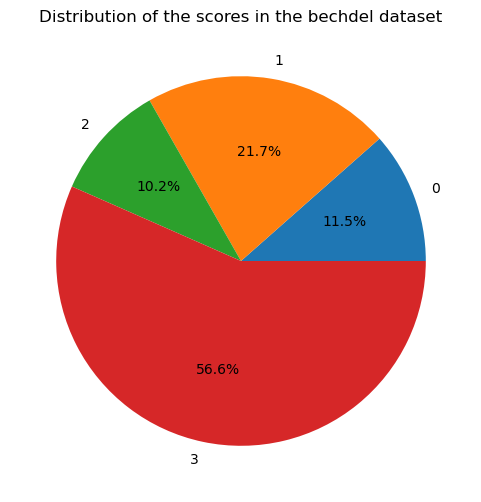

In [107]:
score0 = bechdel[bechdel['rating'] ==0]
score1 = bechdel[bechdel['rating'] ==1]
score2 = bechdel[bechdel['rating'] ==2]
score3 = bechdel[bechdel['rating'] ==3]

#plot score0, score1, score, score3 in pie chart
plt.figure(figsize=(6,6))
plt.pie([len(score0), len(score1), len(score2), len(score3)], labels=['0', '1', '2', '3'], autopct='%1.1f%%')
plt.title('Distribution of the scores in the bechdel dataset')
plt.show()


> From the above plot, it appears that the test isn't that difficult to pass as more than a half of the movies in the dataset. It would be too simple to assert that movies passing the bechdel test are better in terms of gender equality. However, through our research, it was the only "simple data" we found to assess the gender equality. As a first insight, it seems good to perform some analyses on it. 


> we need to figure out what to do with the dubious ratings

In [108]:
# get the percentage of movies with dubious rating
dubious = bechdel[bechdel['dubious'] == 1]
print('there are',len(dubious),'dubious ratings in the bechdel dataset')
print('this is',round(len(dubious)/len(bechdel)*100,2),'% of the total number of movies')


there are 785 dubious ratings in the bechdel dataset
this is 8.86 % of the total number of movies


> As we can see, they represent nearly 9 %, just deleting the rows would be a little bit to quick. Instead, what we are going to deal with them

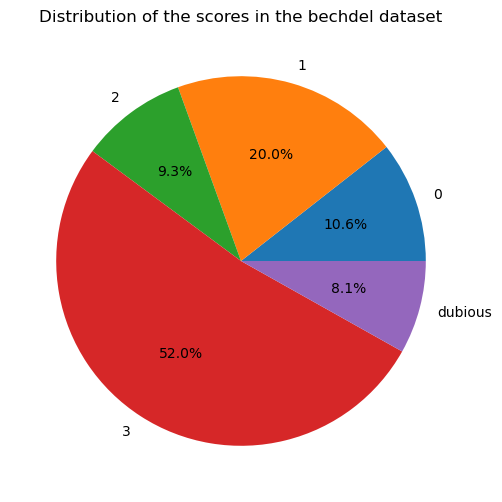

In [109]:
#distribution of the scores in the bechdel dataset
plt.figure(figsize=(6,6))
plt.pie([len(score0), len(score1), len(score2), len(score3), len(dubious)], labels=['0', '1', '2', '3', 'dubious'], autopct='%1.1f%%')
plt.title('Distribution of the scores in the bechdel dataset')
plt.show()

In [110]:
'''#evolution of the mean score of each year in the bechdel dataset scatter plot
plt.figure(figsize=(10,6))
plt.scatter(bechdel.groupby('year')['rating'].mean().index, bechdel.groupby('year')['rating'].mean())
plt.title('Evolution of the scores in the bechdel dataset over the years')
plt.xlabel('year')
plt.ylabel('score')
plt.show()'''

"#evolution of the mean score of each year in the bechdel dataset scatter plot\nplt.figure(figsize=(10,6))\nplt.scatter(bechdel.groupby('year')['rating'].mean().index, bechdel.groupby('year')['rating'].mean())\nplt.title('Evolution of the scores in the bechdel dataset over the years')\nplt.xlabel('year')\nplt.ylabel('score')\nplt.show()"

> We will now conduct a regression analysis to determine if there has been a change in the average bechedel score over the years. In this case, the dependent variable could be a measure of the gender gap (such as the difference in wages between men and women) and the independent variable could be time. This slope would represent the rate at which the gender gap is changing over time.

In [111]:
#perform a linear regression 
X = bechdel.groupby('year')['rating'].mean().index
Y = bechdel.groupby('year')['rating'].mean()
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     242.1
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.67e-32
Time:                        07:43:27   Log-Likelihood:                -102.87
No. Observations:                 140   AIC:                             209.7
Df Residuals:                     138   BIC:                             215.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.2569      2.045    -14.798      0.0

>The results of the regression tend to indicate that there is a positive relationship between the average bechdel score (the dependent variable) and time (the independent variable). The positive coefficient for the time (x1) indicates this. 

> The R^2 values lead to indicate that about 64% of the variation in the dependent variable can be explained by the independent variable. This coeffcient is relatively high and indicates a good fit of the data. 

>The F-statistic of 242 and the associated p-value of 3.67e-32 indicate that the model is statistically significant, which means that it unlikely that results have occured by pure chance. Moreover this confirmed by the t-value of 15.560 and the associated p-value of 0.000. 

> Overall, these results suggest that there has been a positive and statistically significant change in the bechdel score over time. Nevertheless, it is important to note that this conclusion is based on the assumption that the model is a good fit to the data and that all relevant factors have been included in the model. Here regression is just one tool to examine the changes in the bechdel score. 

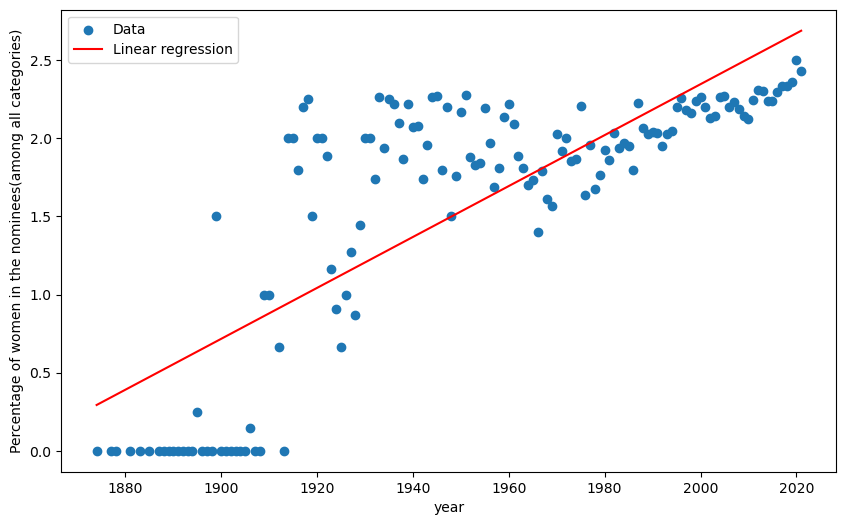

In [112]:
#plot the linear regression results
plt.figure(figsize=(10,6))
plt.scatter(bechdel.groupby('year')['rating'].mean().index,bechdel.groupby('year')['rating'].mean())
plt.plot(bechdel.groupby('year')['rating'].mean().index, predictions, color='red')
#add a legend
plt.legend(['Data','Linear regression'])
plt.xlabel("year")
plt.ylabel("average bechdel score")
plt.show()

> the mean of the bechdel score seems to be increasing over the years, let's now see the evolution of each feature

In [113]:
#create a copy of the bechdel dataset
bechdel_copy = bechdel.copy()
#bechel.dubious==1 replace rating by -1
bechdel_copy.loc[bechdel['dubious'] == 1, 'rating'] = -1


In [114]:
#create a dataframe percentage of movies with score 0, 1, 2, 3, -1 grouped by year
bechdel_score_evol = pd.DataFrame(bechdel_copy.groupby('year')['rating'].value_counts(normalize=True).unstack())
bechdel_score_evol = bechdel_score_evol.reset_index()
bechdel_score_evol = bechdel_score_evol.rename(columns={-1:'dubious', 0:'0', 1:'1', 2:'2', 3:'3'})
bechdel_score_evol
#sanity check
#col_list= ['dubious', 'less than 2 women', 'at least 2 women','talk 2 each other', 'about something other than man' ]
#bechdel_score_evol['Sum'] = bechdel_score_evol[col_list].sum(axis=1)
#bechdel_score_evol

#new column with decade
bechdel_score_evol['decade'] = bechdel_score_evol['year'].apply(lambda x: str(x)[0:3]+'0')
bechdel_score_evol

rating,year,dubious,0,1,2,3,decade
0,1874.0,NaN,1.000000,NaN,NaN,NaN,1870
1,1877.0,NaN,1.000000,NaN,NaN,NaN,1870
2,1878.0,NaN,1.000000,NaN,NaN,NaN,1870
3,1881.0,NaN,1.000000,NaN,NaN,NaN,1880
4,1883.0,NaN,1.000000,NaN,NaN,NaN,1880
...,...,...,...,...,...,...,...
135,2017.0,0.121212,0.071970,0.185606,0.064394,0.556818,2010
136,2018.0,0.091667,0.075000,0.166667,0.079167,0.587500,2010
137,2019.0,0.072340,0.059574,0.174468,0.059574,0.634043,2010
138,2020.0,0.110236,0.062992,0.110236,0.055118,0.661417,2020


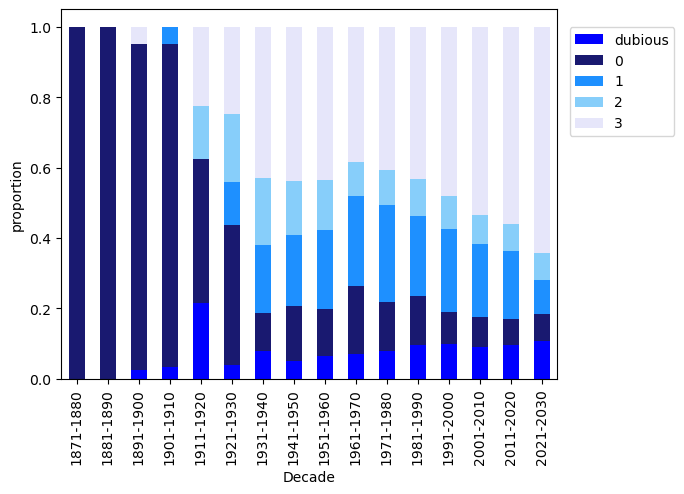

In [115]:
import matplotlib.pyplot as plt

# Group the data by decade and sum the values of the rating categories
bechdel_score_evol_by_decade = bechdel_score_evol.groupby('decade').sum()

bechdel_score_evol_by_decade.drop(columns=['year'], inplace=True)
# Calculate the percentage of each rating category for each decade
bechdel_score_evol_by_decade_pct = bechdel_score_evol_by_decade.divide(bechdel_score_evol_by_decade.sum(axis=1), axis=0)

# Create a stacked bar plot
bechdel_score_evol_by_decade_pct.plot(kind='bar', stacked=True, color=['#0000FF', '#191970', '#1E90FF', '#87CEFA', '#E6E6FA'])

# Set the x-axis label
plt.xlabel('Decade')

# Set the y-axis label in percentage 
plt.ylabel('proportion')


plt.xticks(range(len(bechdel_score_evol_by_decade_pct)), ['1871-1880', '1881-1890', '1891-1900', '1901-1910', '1911-1920', '1921-1930', '1931-1940', '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020', '2021-2030'])

# Add a legend
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 0.97))

# Show the plot
plt.show()

>The dubious movies are at the bottom of the chart. The lighter blue proportion is clearly getting bigger, whereas the proportion of darker blue is getting smaller. This is why we can say that there is evolution in the number of movies which pass the test. We look here at proportion, we do not look in absolute terms. We decided to focus on relative quantities rather than in absolute quantities because have an effect size because the numbers alone might tell meaningless information. Even if the number of movies passing the bechdel test is higher from one year to another, this might be just because the number of movies released increased. In other words, there can be an increase in number with a drop in proportion.